In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import jaccard_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay , classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [3]:
df = pd.read_csv('data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


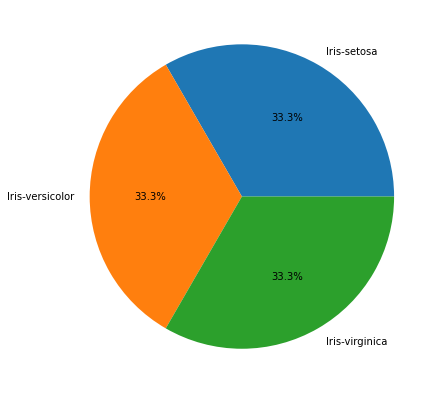

In [4]:
labels =pd.unique(df.species)
size=df.species.value_counts()

fig = plt.figure(figsize =(10, 7))
plt.pie(size, labels = labels , autopct='%1.1f%%')

plt.show()

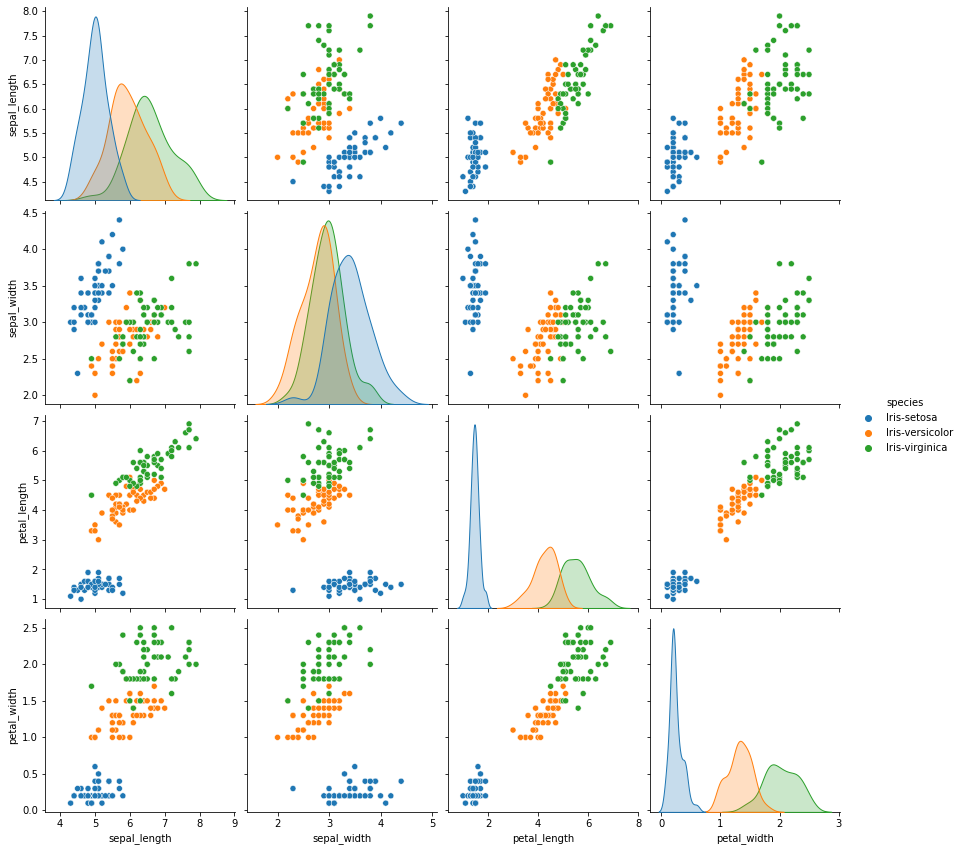

In [5]:
sns.pairplot(df,hue="species",height=3);
plt.show()

In [6]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


### Multi classification

In [7]:
X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = np.array(df[['species']]).reshape(-1,)

In [8]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

In [9]:
LR = LogisticRegression(C = 0.01 , solver = 'liblinear' ).fit(X_train,y_train)
yhat = LR.predict(X_test)
y_hat_test = pd.DataFrame({'yhat': yhat, 'y_test': y_test}, columns=['yhat','y_test'])
y_hat_test

,yhat,y_test
0,Iris-virginica,Iris-virginica
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-virginica,Iris-virginica
4,Iris-virginica,Iris-virginica
5,Iris-virginica,Iris-versicolor
6,Iris-virginica,Iris-versicolor
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


#### Probability estimates

In [10]:
yhat_prob = LR.predict_proba(X_test)
print(yhat_prob)

[[0.10727019 0.39822213 0.49450768]
 [0.46924153 0.31469429 0.21606418]
 [0.09565713 0.40953908 0.49480379]
 [0.07961688 0.40706256 0.51332056]
 [0.09154814 0.40896768 0.49948418]
 [0.17758361 0.39229827 0.43011812]
 [0.13553771 0.39844457 0.46601772]
 [0.5204843  0.29603568 0.18348003]
 [0.46589618 0.31226447 0.22183935]
 [0.14273958 0.40080135 0.45645907]
 [0.428058   0.32871565 0.24322635]
 [0.44483874 0.31940708 0.23575419]
 [0.44311106 0.32293152 0.23395742]
 [0.16917319 0.39570711 0.4351197 ]
 [0.12436845 0.39414434 0.48148721]
 [0.4422984  0.32346362 0.23423798]
 [0.21255628 0.38705869 0.40038503]
 [0.45537981 0.31609454 0.22852566]
 [0.42215748 0.32701632 0.2508262 ]
 [0.14306533 0.39815517 0.4587795 ]
 [0.46759638 0.31405706 0.21834656]
 [0.1169758  0.39670666 0.48631754]
 [0.15543783 0.40213542 0.44242675]
 [0.441372   0.32036178 0.23826622]
 [0.43321371 0.32359838 0.24318791]
 [0.47397344 0.30858161 0.21744495]
 [0.40470524 0.33510028 0.26019448]
 [0.4953533  0.30165878 0.20

#### Jaccard similarity coefficient score

In [11]:
jaccard_score(y_test, yhat , average='micro')

0.7142857142857143

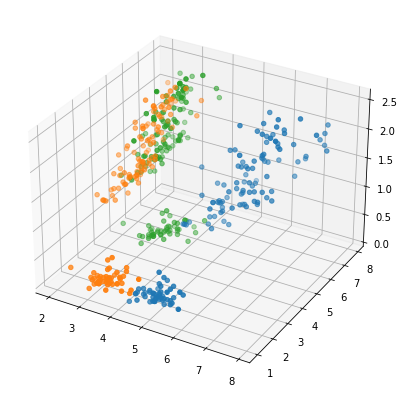

In [12]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(projection='3d')

ax.scatter(df[['sepal_length']].values, df[['petal_length']].values,df[['petal_width']].values)
ax.scatter(df[['sepal_width']].values, df[['petal_length']].values,df[['petal_width']].values)
ax.scatter(df[['sepal_width']].values, df[['sepal_length']].values,df[['petal_width']].values)

plt.show()

<h3>K nearest neighbor (KNN)</h3>

In [13]:
k = 5

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_2 = neigh.predict(X_test)
y_hat_test_2 = pd.DataFrame({'yhat_2': yhat_2, 'y_test': y_test}, columns=['yhat_2','y_test'])
y_hat_test_2

,yhat_2,y_test
0,Iris-virginica,Iris-virginica
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-virginica,Iris-virginica
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-versicolor
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


In [14]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_2))

Train set Accuracy:  0.975
Test set Accuracy:  0.9666666666666667


In [81]:
k = 7

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_2 = neigh.predict(X_test)
y_hat_test_2 = pd.DataFrame({'yhat_2': yhat_2, 'y_test': y_test}, columns=['yhat_2','y_test'])
y_hat_test_2

,yhat_2,y_test
0,Iris-virginica,Iris-virginica
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-virginica,Iris-virginica
4,Iris-virginica,Iris-virginica
5,Iris-versicolor,Iris-versicolor
6,Iris-virginica,Iris-versicolor
7,Iris-setosa,Iris-setosa
8,Iris-setosa,Iris-setosa
9,Iris-virginica,Iris-virginica


In [15]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_2))

Train set Accuracy:  0.975
Test set Accuracy:  0.9666666666666667
